In [1]:
import sys
import numpy
import matplotlib
import pandas
import sklearn


In [10]:
import numpy as np
from sklearn import preprocessing,cross_validation,model_selection
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report,accuracy_score
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
##Adding the fields which we require
names = ['clump_thickness', 'univore_cell_size','uniform_cell_shape','marginal_adhesion','signal_epithelial_size','bare_nuclei',
        'bland_chromatin','normal_nucleoli','mitoses','class']
db = pd.read_csv(url, names = names)

In [12]:
db.head()

,clump_thickness,univore_cell_size,uniform_cell_shape,marginal_adhesion,signal_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
1000025,5,1,1,1,2,1,3,1,1,2
1002945,5,4,4,5,7,10,3,2,1,2
1015425,3,1,1,1,2,2,3,1,1,2
1016277,6,8,8,1,3,4,3,7,1,2
1017023,4,1,1,3,2,1,3,1,1,2


In [13]:
##Preprocessing the blank dataset

db.replace('?' , -99999, inplace = True)

print(db.columns)

Index([u'clump_thickness', u'univore_cell_size', u'uniform_cell_shape',
       u'marginal_adhesion', u'signal_epithelial_size', u'bare_nuclei',
       u'bland_chromatin', u'normal_nucleoli', u'mitoses', u'class'],
      dtype='object')


In [14]:
##Printing the shape of the db
db.shape
db.describe()

,clump_thickness,univore_cell_size,uniform_cell_shape,marginal_adhesion,signal_epithelial_size,bland_chromatin,normal_nucleoli,mitoses,class
count,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


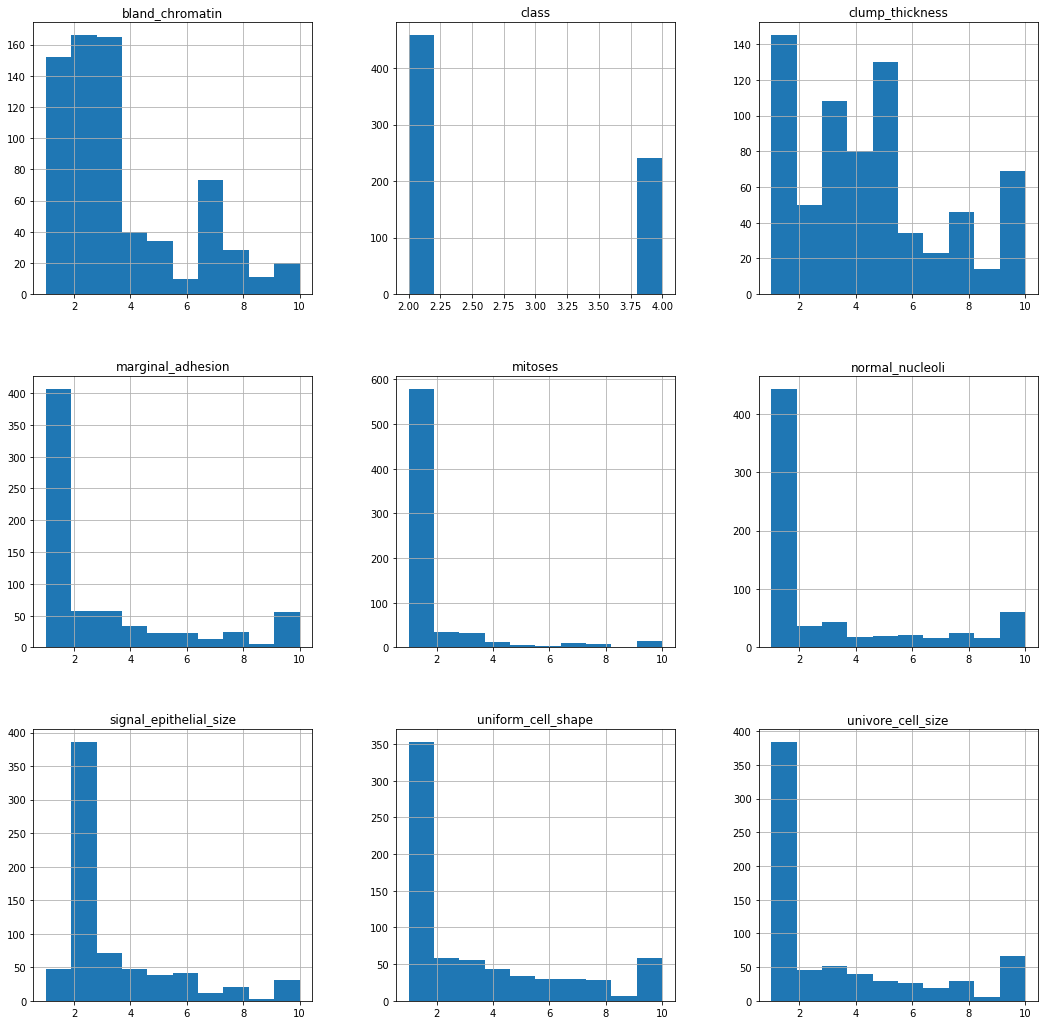

In [15]:
##Plotting histograms for each columns

db.hist(figsize =(18,18))
plt.show()

In [16]:
##Training the Data

array = db.values
X = np.array(db.drop(['class'],1))
y = np.array(db['class'])
seed = 42
scoring = 'accuracy'

X_train, X_test, y_train,y_test = cross_validation.train_test_split(X,y, test_size = 0.20 , random_state = 8)
print(y_train)

[2 4 2 4 2 2 2 2 4 2 2 4 2 2 4 2 4 4 2 2 2 2 2 4 4 2 2 4 2 2 2 4 2 4 2 4 4
 2 2 2 2 2 4 4 4 2 2 2 4 2 2 2 2 2 4 2 2 4 2 2 4 4 4 2 2 2 4 2 2 2 2 4 2 2
 2 2 2 2 4 2 2 2 2 4 2 2 2 2 4 2 2 4 2 2 2 2 4 2 4 2 2 4 2 4 2 2 4 2 2 4 4
 4 4 4 4 2 2 2 2 4 2 2 2 4 2 2 4 2 4 2 4 2 4 2 2 4 4 4 2 2 2 4 4 4 4 2 2 2
 2 2 4 2 2 2 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 4 2 2 2 2 2 2 4 4 4 2 2 4 2 2 2
 2 4 2 2 4 4 2 2 2 2 4 2 4 4 2 4 4 4 4 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 2 4
 2 2 4 2 2 2 2 2 2 2 2 2 4 2 2 4 2 2 4 4 2 2 4 2 2 2 2 2 4 4 2 2 2 2 2 2 4
 4 4 4 2 4 2 2 2 2 4 2 2 2 4 4 2 2 4 4 4 2 4 2 2 4 4 2 2 4 2 2 2 2 2 2 2 2
 2 4 2 2 2 4 2 2 2 4 2 2 4 4 4 2 2 2 2 4 4 2 4 2 2 2 2 2 4 2 2 4 4 2 4 4 2
 4 2 2 4 2 2 4 4 2 4 2 2 2 2 2 4 4 2 2 4 4 4 4 2 2 2 2 2 4 2 4 2 4 2 2 2 4
 4 2 4 4 2 4 2 2 4 4 2 4 4 4 2 4 4 2 2 4 4 2 4 4 2 4 2 2 2 2 4 4 2 2 2 2 2
 4 2 2 2 2 2 2 4 2 2 2 2 2 4 2 4 2 2 2 2 2 2 4 4 2 2 2 4 2 4 2 2 2 2 2 4 4
 2 2 4 2 2 4 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2 2 2 2 4 4 2 2 4 2 4 4 2 4 4
 2 4 4 4 2 4 2 4 4 2 4 2 

In [17]:
models = []
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5)))
models.append(("SVM", SVC()))

##Evaluating each model through Cross-Validation
results = []
names = []

for name, model in models :
    kfold = model_selection.KFold(n_splits = 10, random_state = 1)
    cross_val_results = model_selection.cross_val_score(model, X_train , y_train , cv = kfold , scoring = 'accuracy') 
    ##The cv splits the training data into 10 rows and uses each row for testing against the others for training. 
    results.append(cross_val_results)
    names.append(name)
    message = "%s %s :%f (%s :%f)" % (name, "Mean" , cross_val_results.mean() , "Standard Deviation" , cross_val_results.std())
    print(message)

KNN Mean :0.969610 (Standard Deviation :0.021185)
SVM Mean :0.962435 (Standard Deviation :0.023210)


In [18]:
for name , model in models:
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    print(name)
    print(accuracy_score(y_test, predictions))
    print(classification_report(y_test, predictions))
    
    

KNN
0.9642857142857143
             precision    recall  f1-score   support

          2       1.00      0.95      0.97        92
          4       0.91      1.00      0.95        48

avg / total       0.97      0.96      0.96       140

SVM
0.9285714285714286
             precision    recall  f1-score   support

          2       1.00      0.89      0.94        92
          4       0.83      1.00      0.91        48

avg / total       0.94      0.93      0.93       140



In [22]:
model = KNeighborsClassifier(n_neighbors = 5)
model.fit(X_train,y_train)
accuracy = model.score(X_test,y_test)
print(accuracy)


0.9642857142857143
